In [34]:
import  os
import numpy as np
import pandas as pd
import scipy.stats
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [35]:
class DataModels:
    data=[]
    results=[]
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    filepath='Regression_data'
    
    def __init__(self):
        filepath='Regression_data'
        load_data=np.genfromtxt(os.path.join(filepath, filename), delimiter=',' ,\
                             usecols=np.arange(unpredictable, columns), skip_header=skiprows)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        
    def pre_process(self):
        
        #self.data=self.missing_values(self.data)
        self.x_train, self.x_test,\
        self.y_train, self.y_test =sklearn.model_selection.train_test_split(self.data, self.results, test_size=0.3, \
                                                                                random_state=15)
        scaler=sklearn.preprocessing.StandardScaler().fit(self.x_train)
        self.x_train=scaler.transform(self.x_train)
        self.x_test=scaler.transform(self.x_test)
        
    def missing_values(self, data):
        imputer = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='mean')
        imputer.fit(data)
        return imputer.transform(data)
        
class Communities(DataModels):
    
    def __init__(self):
        
        load_data=np.genfromtxt(os.path.join(self.filepath, 'communities.data'), delimiter=',' ,\
                                usecols=np.arange(5, 128), skip_header=0)
        
        self.data=load_data[:,:-1]
        self.data=self.missing_values(self.data)
        self.results = load_data[:,-1]
        self.pre_process()
        
class Bike(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'hour.csv'), delimiter=',' ,\
                             usecols=np.arange(2, 17), skiprows=1)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()

class Facebook(DataModels):
    def __init__(self):
        
        def to_int(s):
            if s.decode('utf-8')=="Photo":
                return 0
            elif s.decode('utf-8')=="Status":
                return 1
            elif s.decode('utf-8')=="Link":
                return 2
            else:
                return 3
        
        load_data=np.genfromtxt(os.path.join(self.filepath, 'dataset_Facebook.csv'), delimiter=';' , converters={1:to_int},\
                                skip_header=1, dtype=np.int32 )
        

       
        self.data=load_data[:, :-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Concrete(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'Concrete_data.csv'), delimiter=',' ,\
                                 skiprows=1)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Student(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'student-por.csv'), delimiter=';' ,\
                                 usecols=(2, 6, 7,12, 13, 14, 23,24,25,26,27,28,29,30,31,32 ),\
                              skiprows=1, dtype=np.int32, converters={30: lambda x: int(x.decode('utf-8').strip("\"")),\
                                                                      31:lambda x: int(x.decode('utf-8').strip("\""))})
        
        self.data=load_data[: ,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        
class Sgemm(DataModels):
    def __init__(self):
        
        load_data=np.genfromtxt(os.path.join(self.filepath, 'sgemm_product.csv'), delimiter=',' ,\
                                 skip_header=1)
        
        self.data=load_data[:,:14]
        self.results = load_data[:,14:-1]
        self.pre_process()
        
class WineQuality(DataModels):
    def __init__(self):
        
        load_data1=np.loadtxt(os.path.join(self.filepath, 'winequality-red.csv'), delimiter=';' ,\
                                 skiprows=1)
        load_data2=np.loadtxt(os.path.join(self.filepath, 'winequality-white.csv'), delimiter=';' ,\
                                 skiprows=1)
        load_data=np.vstack((load_data1, load_data2))
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()
        

        
class Qsar(DataModels):
    def __init__(self):
        
        load_data=np.loadtxt(os.path.join(self.filepath, 'qsar_aquatic_toxicity.csv'), delimiter=';' ,\
                                skiprows=0)
        
        self.data=load_data[:,:-1]
        self.results = load_data[:,-1]
        self.pre_process()

In [36]:
obj=[]
obj.append(Communities())
obj.append(Bike())
# obj.append(Facebook())
obj.append(WineQuality())
obj.append(Sgemm())
obj.append(Qsar())
obj.append(Concrete())
obj.append(Student())

titles = ["Communities", "Bike", "WineQuality", "Sgemm", "Qsar", "Concrete", "Student"]

In [49]:
# linear regressors
linear_regressors = [sklearn.linear_model.LinearRegression() for i in obj]
linear_regressors = [linear_regressors[i].fit(obj[i].x_train, obj[i].y_train) for i in range(len(linear_regressors))]

y_predicted = [linear_regressors[i].predict(obj[i].x_test) for i in range(len(linear_regressors))]


# df = [pd.DataFrame({'Actual': obj[i].y_test, 'Predicted': y_predicted[i]}) for i in range(len(y_predicted))]

# for i in range(len(obj)):
#     plt.scatter(obj[i].x_test, obj[i].y_test.reshape(-1, 1), color='b')
#     plt.plot(obj[i].x_test, y_predicted[i].reshape(-1, 1), color='k')
#     plt.show()

In [54]:
# 2. Support vector regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc_X = StandardScaler()
sc_y = StandardScaler()
for i in range(len(obj)):
    X = sc_X.fit_transform(obj[i].x_train)
    y = sc_y.fit_transform(obj[i].y_train)
    regressor = SVR(kernel='rbf')
    regressor.fit(X,y)
    y_pred = regressor.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[0.5  0.01 0.17 ... 0.04 0.08 0.37].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

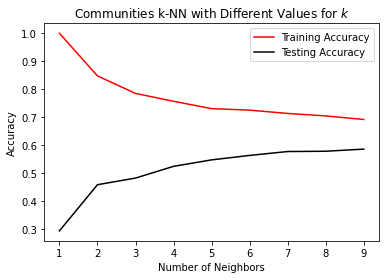

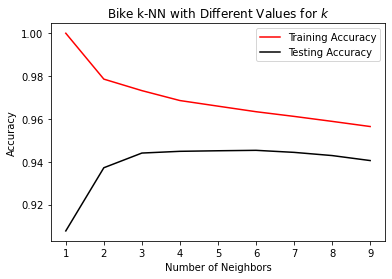

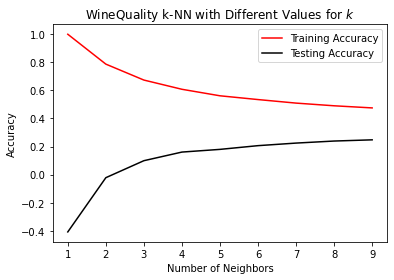

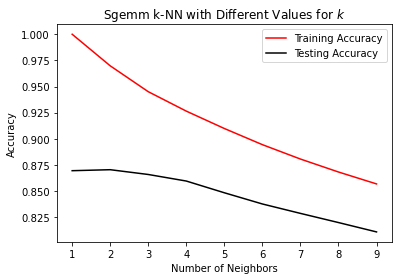

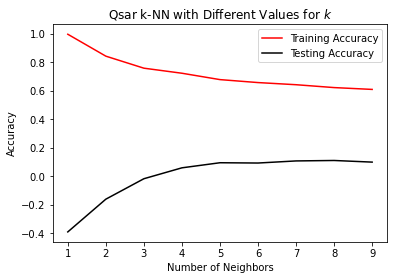

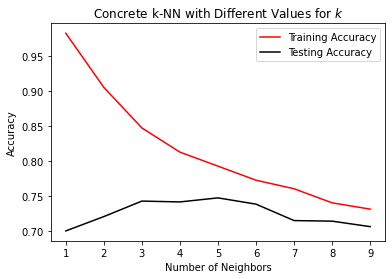

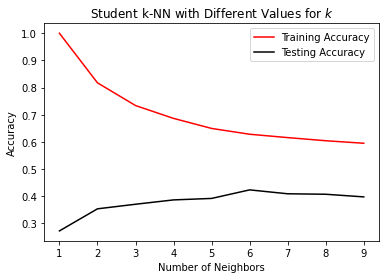

In [82]:
# 5. k-nearest neighbours regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
import math

# plot_complexity_curve function taken from https://towardsdatascience.com/intro-to-scikit-learns-k-nearest-neighbors-classifier-and-regressor-4228d8d1cba6
def plot_complexity_curve(title, k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title=title+' k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()


scaler = MinMaxScaler(feature_range=(0, 1))
k = np.arange(1, 10)

for i in range(len(obj)):
    x_train_scaled = scaler.fit_transform(obj[i].x_train)
    x_train = pd.DataFrame(x_train_scaled)
    
    x_test_scaled = scaler.fit_transform(obj[i].x_test)
    x_test = pd.DataFrame(x_test_scaled)
    
    plot_complexity_curve(titles[i], k, KNeighborsRegressor, x_train, x_test, obj[i].y_train, obj[i].y_test)

In [ ]:
#7. Gaussian process regression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

for i in range(len(obj)):
    kernel = DotProduct() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(obj[i].x_train, obj[i].y_train)
    gpr.score(X, y)
    gpr.predict(X[:2,:], return_std=True)